In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import numpy as np
from datasets import load_dataset
from iterlike_equil_dataset import IterlikeDataset
from iterlike_equil_dataset.plot import contourf, plot_equilibrium


In [87]:
dataset = IterlikeDataset(dataset_id = "matteobonotto/iterlike-equil-sample")
print(dataset)

Loading eqilibrium data
Load geometry data
done
ITER-like equilibrium dataset with 8192 samples and keys:
 mag_measures
 flux
 rhs
 coils_current
 separatrix
 is_diverted
 p_profile



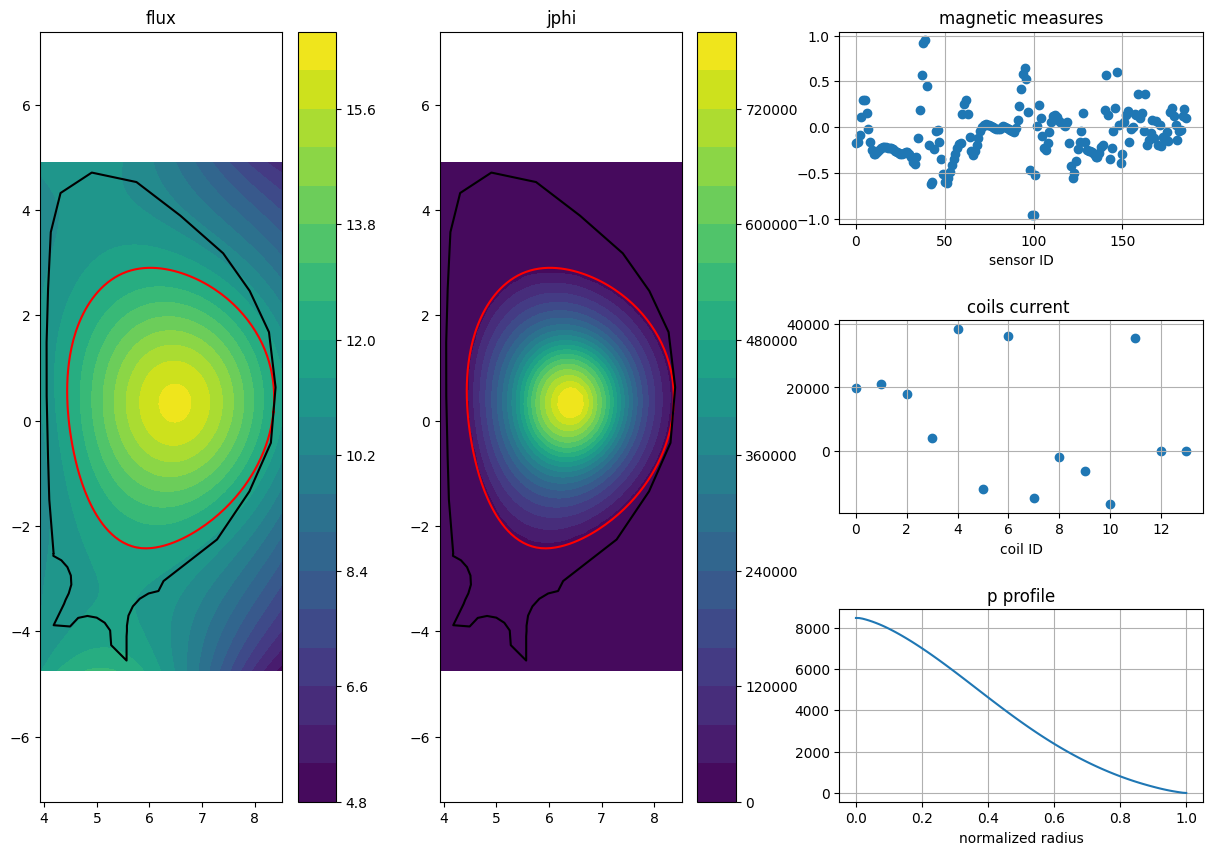

In [88]:
equilibrium = dataset[0]
plot_equilibrium(equilibrium)

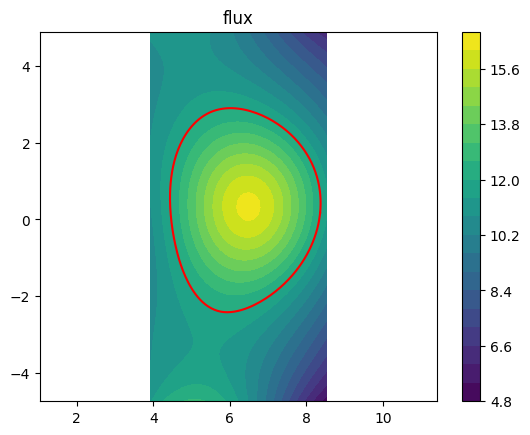

In [15]:
contourf(
    z = equilibrium.flux,
    RR = equilibrium.grid.r,
    ZZ = equilibrium.grid.z,
    separatrix=equilibrium.separatrix,
    title='flux'    
)

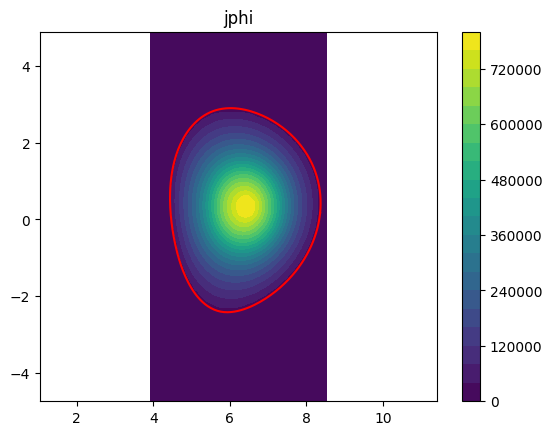

In [16]:
from iterlike_equil_dataset.constants import mu0

jphi = - equilibrium.rhs / (mu0 * equilibrium.grid.r)

contourf(
    z = jphi,
    RR = equilibrium.grid.r,
    ZZ = equilibrium.grid.z,
    separatrix=equilibrium.separatrix,
    title='jphi'    

)

In [17]:
import random
from datasets import Dataset
from typing import Iterable, List

idxs = random.sample(range(len(dataset)), 1000)
idxs = dataset.equil_data['is_diverted']


In [ ]:

flux = dataset.equil_data['flux']
is_diverted = dataset.equil_data["is_diverted"]
# def retrieve_rows(dataset: Dataset, indexes: Iterable[int], keys:List[str]):
#     """Retrieved n rows from the `dataset` for the specific keys."""
#     rows = [dataset[i] for i in indexes]
#     return np.array([row[key] for key in keys} for row in rows]

# flux = retrieve_rows(dataset.equil_data, indexes=idxs, keys = ['flux'])

IndexError: boolean index did not match indexed array along axis 1; size of axis is 200 but size of corresponding boolean axis is 1

In [78]:
separatrix = dataset.equil_data['separatrix']#[is_diverted.ravel()==0, ...]
p_profile = dataset.equil_data['p_profile']#[is_diverted.ravel()==0, ...]
c_curr = dataset.equil_data['coils_current']#[is_diverted.ravel()==0, ...]
mag_measures = dataset.equil_data['mag_measures']#[is_diverted.ravel()==0, ...]

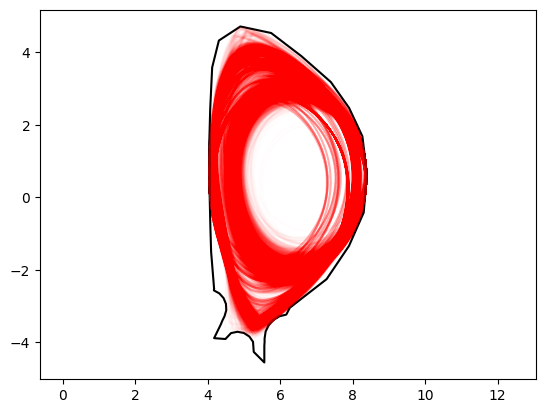

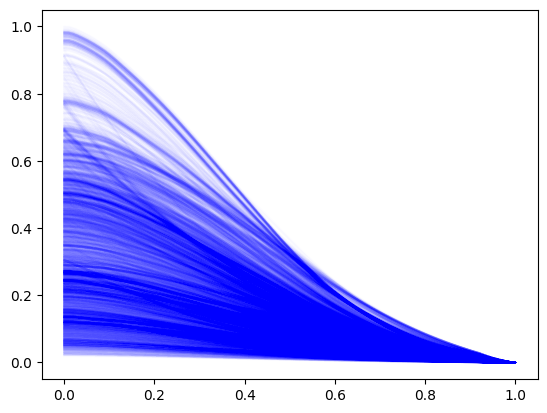

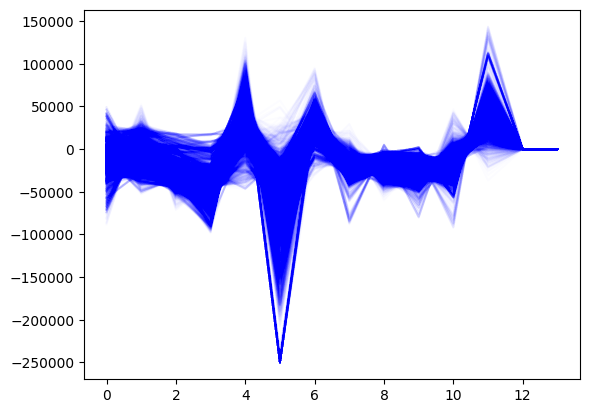

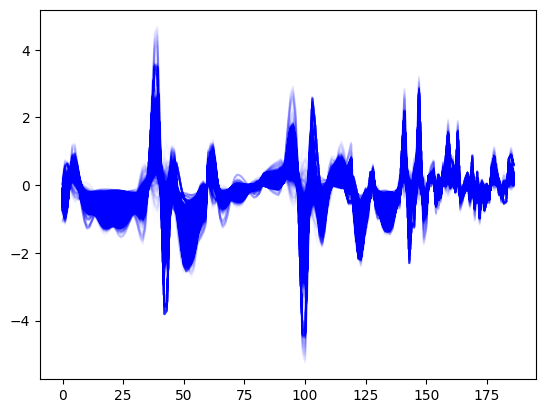

In [79]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(equilibrium.first_wall.r, equilibrium.first_wall.z, 'k')
plt.plot(separatrix[:,:,0].T, separatrix[:,:,1].T, alpha=0.01, color='r')
plt.axis("equal")
plt.show()

fig = plt.figure()
plt.plot(
    (np.linspace(0,1,p_profile.shape[-1])[None, ...]*np.ones_like(p_profile)).T, 
    p_profile.T/p_profile.max(), alpha=0.01, color='b')
plt.show()

fig = plt.figure()
plt.plot(
    c_curr.T, alpha=0.01, color='b')
plt.show()

fig = plt.figure()
plt.plot(
    mag_measures.T, alpha=0.01, color='b')
plt.show()


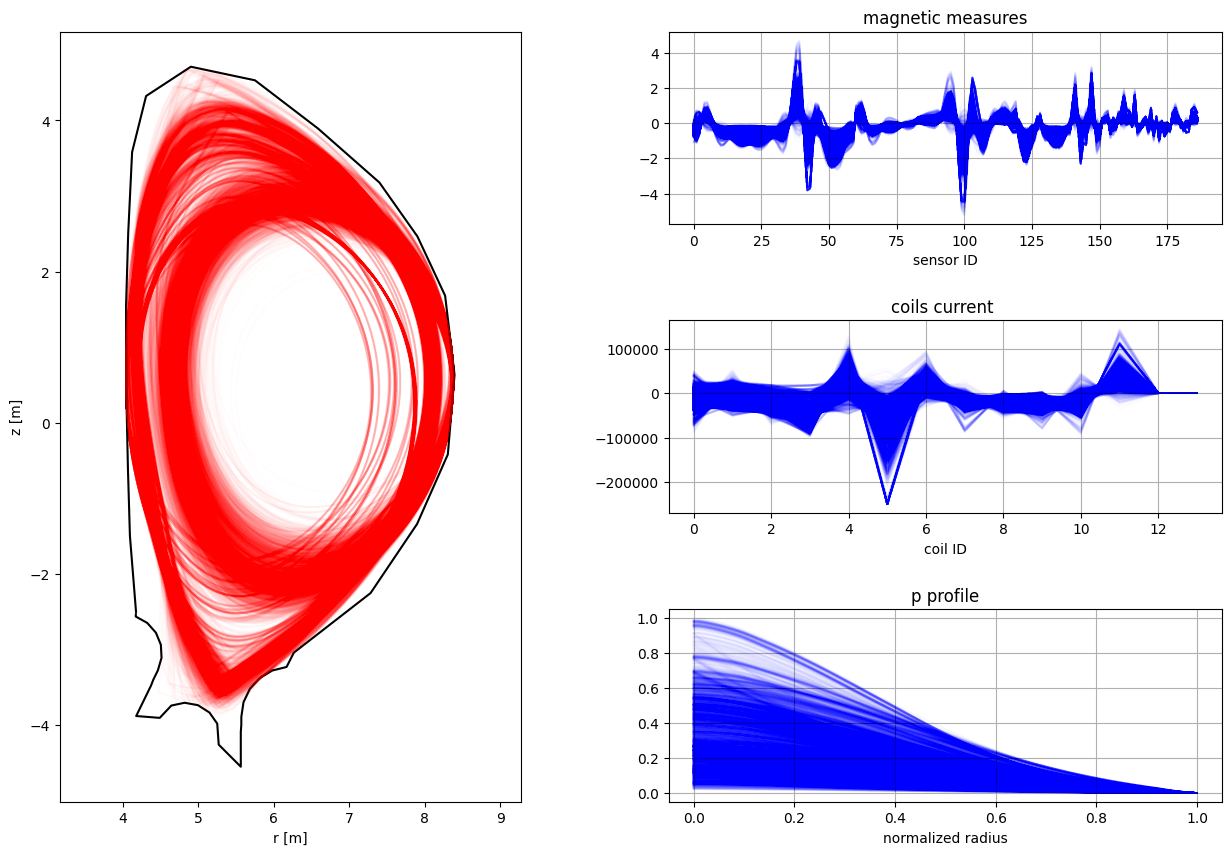

<Figure size 640x480 with 0 Axes>

In [84]:
from typing import Optional
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# flux = equilibrium.flux
# jphi = equilibrium.jphi
# coil_curr = equilibrium.coils_current
# mag_measures = equilibrium.mag_measures
# p_profile = equilibrium.p_profile
# RR = equilibrium.grid.r
# ZZ = equilibrium.grid.z
# first_wall = equilibrium.first_wall
# separatrix = equilibrium.separatrix

def contourf(z, RR, ZZ, title="", separatrix=None, first_wall=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    c = ax.contourf(RR, ZZ, z, 20)
    ax.axis("equal")
    plt.colorbar(c, ax=ax)
    if separatrix is not None:
        ax.plot(separatrix[:, 0], separatrix[:, 1], "r")
    if first_wall is not None:
        ax.plot(first_wall.r, first_wall.z, "k")
    ax.set_title(title)

# Create figure and master GridSpec
fig = plt.figure(figsize=(15, 10))
outer = gridspec.GridSpec(
    nrows=1, ncols=3, width_ratios=[1, -.1, 1.2], wspace=0.3
)

# Contour plots (left and middle) take full height
ax1 = fig.add_subplot(outer[0, 0])
# contourf(flux, RR, ZZ, separatrix=separatrix, first_wall=first_wall, title="flux", ax=ax1)
ax1.plot(equilibrium.first_wall.r, equilibrium.first_wall.z, 'k')
ax1.plot(separatrix[:,:,0].T, separatrix[:,:,1].T, alpha=0.01, color='r')
ax1.axis("equal")
ax1.set_xlabel("r [m]")
ax1.set_ylabel("z [m]")
# ax1.set_title("Separatrix")
# ax2 = fig.add_subplot(outer[0, 1])
# contourf(jphi, RR, ZZ, separatrix=separatrix, first_wall=first_wall, title="jphi", ax=ax2)

# Right column: nested GridSpec for vertical stacking
inner = gridspec.GridSpecFromSubplotSpec(
    3, 1, subplot_spec=outer[0, 2], hspace=0.5
)

ax3 = fig.add_subplot(inner[0])
ax4 = fig.add_subplot(inner[1])
ax5 = fig.add_subplot(inner[2])

# # plot measures
# ax3.scatter(np.arange(mag_measures.shape[0]), mag_measures.reshape(-1, 1))
# ax3.set_title("magnetic measures")
# ax3.set_xlabel("sensor ID")
# ax3.grid(True)

# # plot currents
# ax4.scatter(np.arange(coil_curr.shape[0]), coil_curr.reshape(-1, 1))
# ax4.set_title("coils current ")
# ax4.set_xlabel("coil ID")
# ax4.grid(True)

# # plot p profile
# ax5.plot(np.linspace(0, 1, p_profile.shape[0]), p_profile.reshape(-1, 1))
# ax5.set_title("p profile")
# ax3.set_xlabel("normalized radius")
# ax5.grid(True)

fig = plt.figure()
ax3.plot(
    mag_measures.T, alpha=0.01, color='b')
ax3.set_title("magnetic measures")
ax3.set_xlabel("sensor ID")
ax3.grid(True)

ax4.plot(
    c_curr.T, alpha=0.01, color='b')
ax4.set_title("coils current ")
ax4.set_xlabel("coil ID")
ax4.grid(True)

ax5.plot(
    (np.linspace(0,1,p_profile.shape[-1])[None, ...]*np.ones_like(p_profile)).T, 
    p_profile.T/p_profile.max(), alpha=0.01, color='b')
ax5.set_title("p profile")
ax5.set_xlabel("normalized radius")
ax5.grid(True)

plt.show()


In [ ]:

import random

idx = random.sample(range(len(dataset)), 1000)


flux = dataset['flux'][idx, ...]
jphi = equilibrium.jphi
coil_curr = equilibrium.coils_current
mag_measures = equilibrium.mag_measures
p_profile = equilibrium.p_profile
RR = equilibrium.grid.r
ZZ = equilibrium.grid.z
first_wall = equilibrium.first_wall
separatrix = equilibrium.separatrix

def contourf(z, RR, ZZ, title="", separatrix=None, first_wall=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    c = ax.contourf(RR, ZZ, z, 20)
    ax.axis("equal")
    plt.colorbar(c, ax=ax)
    if separatrix is not None:
        ax.plot(separatrix[:, 0], separatrix[:, 1], "r")
    if first_wall is not None:
        ax.plot(first_wall.r, first_wall.z, "k")
    ax.set_title(title)

# Create figure and master GridSpec
fig = plt.figure(figsize=(15, 10))
outer = gridspec.GridSpec(
    nrows=1, ncols=2, width_ratios=[1, 1.5], wspace=0.3
)

# Contour plots (left and middle) take full height
ax1 = fig.add_subplot(outer[0, 0])
contourf(flux, RR, ZZ, separatrix=separatrix, first_wall=first_wall, title="flux", ax=ax1)

# ax2 = fig.add_subplot(outer[0, 1])
# contourf(jphi, RR, ZZ, separatrix=separatrix, first_wall=first_wall, title="jphi", ax=ax2)

# Right column: nested GridSpec for vertical stacking
inner = gridspec.GridSpecFromSubplotSpec(
    3, 1, subplot_spec=outer[0, 2], hspace=0.5
)

ax3 = fig.add_subplot(inner[0])
ax4 = fig.add_subplot(inner[1])
ax5 = fig.add_subplot(inner[2])

# plot measures
ax3.scatter(np.arange(mag_measures.shape[0]), mag_measures.reshape(-1, 1))
ax3.set_title("magnetic measures")
ax3.set_xlabel("sensor ID")
ax3.grid(True)

# plot currents
ax4.scatter(np.arange(coil_curr.shape[0]), coil_curr.reshape(-1, 1))
ax4.set_title("coils current ")
ax4.set_xlabel("coil ID")
ax4.grid(True)

# plot p profile
ax5.plot(np.linspace(0, 1, p_profile.shape[0]), p_profile.reshape(-1, 1))
ax5.set_title("p profile")
ax3.set_xlabel("normalized radius")
ax5.grid(True)

plt.show()
